<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/09_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Файлы для обучения/titanic.csv')
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,27.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


In [3]:
target = titanic.Survived
data = titanic.drop(columns='Survived')


In [4]:
trees = [1] + list(range(10,100,10))

In [5]:
%%time

ada_scoring = []
for tree in trees:
  ada = AdaBoostClassifier(n_estimators=tree)
  score = cross_val_score(ada,data, target,scoring= 'roc_auc', cv=3)
  ada_scoring.append(score)
ada_scoring = np.asmatrix(ada_scoring)
ada_scoring

CPU times: user 2.61 s, sys: 11.2 ms, total: 2.62 s
Wall time: 2.63 s


matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.80560349, 0.85092513, 0.88447896],
        [0.79925223, 0.84766561, 0.88562937],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80136133, 0.84210526, 0.88203432],
        [0.80299108, 0.84385486, 0.87340619],
        [0.8038539 , 0.84450197, 0.87824753]])

In [6]:
%%time

gbc_scoring = []
for tree in trees:
  gbc = GradientBoostingClassifier(n_estimators=tree)
  score = cross_val_score(gbc,data, target,scoring= 'roc_auc', cv=3)
  gbc_scoring.append(score)
gbc_scoring = np.asmatrix(gbc_scoring)
gbc_scoring

CPU times: user 1.56 s, sys: 0 ns, total: 1.56 s
Wall time: 1.57 s


matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83247052, 0.87364586, 0.88179465],
        [0.81708369, 0.8781996 , 0.8825616 ],
        [0.81797047, 0.87374173, 0.88196242],
        [0.81451922, 0.87117726, 0.88730707],
        [0.81413575, 0.86930783, 0.88349631],
        [0.80989359, 0.86978717, 0.88117151],
        [0.80972582, 0.871369  , 0.87635414],
        [0.81389608, 0.87182437, 0.87501198]])

In [7]:
%%time

xgb_scoring = []
for tree in trees:
  xgb = XGBClassifier(n_estimators=tree)
  score = cross_val_score(xgb,data, target,scoring= 'roc_auc', cv=3)
  xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)
xgb_scoring

CPU times: user 717 ms, sys: 27.1 ms, total: 744 ms
Wall time: 815 ms


matrix([[0.82019941, 0.84713834, 0.87673761],
        [0.81288946, 0.87072189, 0.88711533],
        [0.82842009, 0.87208801, 0.88359218],
        [0.82504074, 0.87206404, 0.88809798],
        [0.82707794, 0.871369  , 0.88613268],
        [0.82616719, 0.87201611, 0.88100374],
        [0.82401016, 0.87053015, 0.88337647],
        [0.82139776, 0.86834915, 0.88311284],
        [0.82264404, 0.86887643, 0.88618062],
        [0.82329115, 0.86856485, 0.88618062]])

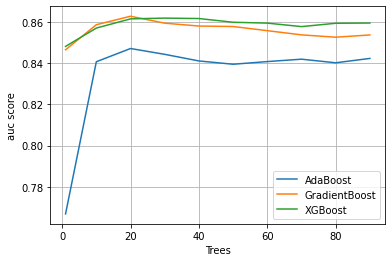

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(trees,ada_scoring.mean(axis=1), label = 'AdaBoost')
plt.plot(trees,gbc_scoring.mean(axis=1), label = 'GradientBoost')
plt.plot(trees,xgb_scoring.mean(axis=1), label = 'XGBoost')
plt.grid(True)
plt.xlabel('Trees')
plt.ylabel('auc score')
plt.legend(loc='lower right')